# Ch6-upgraded-tavily-c-many-tools

## Get Key Tokens

In [1]:
import os
from pathlib import Path

# Method 1: Using python-dotenv (recommended)
# First install: pip install python-dotenv
try:
    from dotenv import load_dotenv
    
    # Load .env file from home directory
    dotenv_path = Path.home() / '.env'
    load_dotenv(dotenv_path)
    
    # Now you can access environment variables
#    api_key = os.getenv('OPENAI_API_KEY')
#    database_url = os.getenv('DATABASE_URL')
    
    print("Using python-dotenv:")
#    print(f"API Key: {api_key}")
#    print(f"Database URL: {database_url}")
    
except ImportError:
    print("python-dotenv not installed. Install with: pip install python-dotenv")

Using python-dotenv:


In [2]:
import ast
from typing import Annotated, TypedDict

from langchain_tavily import TavilySearch
from langchain_core.documents import Document
from langchain_core.messages import HumanMessage
from langchain_core.tools import tool
from langchain_core.vectorstores.in_memory import InMemoryVectorStore
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

from langgraph.graph import START, StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


@tool
def calculator(query: str) -> str:
    """A simple calculator tool. Input should be a mathematical expression."""
    return ast.literal_eval(query)


# Use the new langchain-tavily package (recommended)
search = TavilySearch(max_results=5)
tools = [search, calculator]

embeddings = OpenAIEmbeddings()
model = ChatOpenAI(temperature=0.1)

tools_retriever = InMemoryVectorStore.from_documents(
    [Document(tool.description, metadata={"name": tool.name}) for tool in tools],
    embeddings,
).as_retriever()


class State(TypedDict):
    messages: Annotated[list, add_messages]
    selected_tools: list[str]


def model_node(state: State) -> State:
    selected_tools = [tool for tool in tools if tool.name in state["selected_tools"]]
    res = model.bind_tools(selected_tools).invoke(state["messages"])
    return {"messages": res}


def select_tools(state: State) -> State:
    query = state["messages"][-1].content
    tool_docs = tools_retriever.invoke(query)
    return {"selected_tools": [doc.metadata["name"] for doc in tool_docs]}


builder = StateGraph(State)
builder.add_node("select_tools", select_tools)
builder.add_node("model", model_node)
builder.add_node("tools", ToolNode(tools))
builder.add_edge(START, "select_tools")
builder.add_edge("select_tools", "model")
builder.add_conditional_edges("model", tools_condition)
builder.add_edge("tools", "model")

graph = builder.compile()



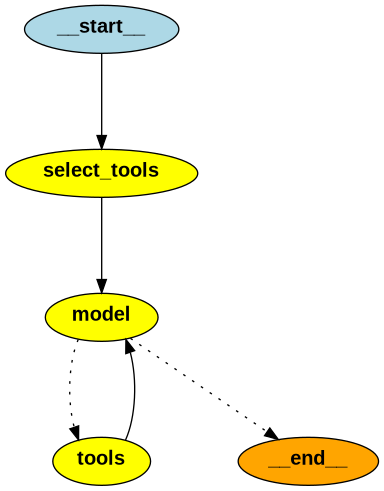

In [3]:
from IPython.display import Image

Image(graph.get_graph().draw_png())


In [ ]:
# Example usage
input = {
    "messages": [
        HumanMessage(
            "How old was the 30th president of the United States when he died?"
        )
    ]
}

for c in graph.stream(input):
    print(c)

{'select_tools': {'selected_tools': ['tavily_search', 'calculator']}}
{'model': {'messages': AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ECAOrW1orHvZ55OfG7YZUWm4', 'function': {'arguments': '{"query":"2023-1872"}', 'name': 'calculator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 849, 'total_tokens': 867, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BqcONjeBdb9NIymJM8LfYTnNP9yE6', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a5a9a8e0-ecae-43ab-8499-79799ef2e3ec-0', tool_calls=[{'name': 'calculator', 'args': {'query': '2023-1872'}, 'id': 'call_ECAOrW1orHvZ55OfG7YZUWm4', 'type': 'tool_call'}], usage_metadata={'inp

I'll convert your code from the deprecated `langchain_community.tools.tavily_search` to the new `langchain-tavily` package:Perfect! Here's what changed in the migration:

## **Key Changes Made:**

### **1. Import Statement**
```python
# OLD (deprecated):
from langchain_community.tools.tavily_search import TavilySearchResults

# NEW (recommended):
from langchain_tavily import TavilySearch
```

### **2. Class Name**
```python
# OLD:
search = TavilySearchResults(max_results=5)

# NEW:
search = TavilySearch(max_results=5)
```

## **Installation Required**

You'll need to install the new package:
```bash
pip install langchain-tavily
```

## **Benefits of the Migration**

Think of this migration like upgrading from an old smartphone to the latest model:

**Old Package (`langchain_community.tools.tavily_search`)**:
- Basic search functionality only
- Will eventually be discontinued
- Limited features

**New Package (`langchain-tavily`)**:
- **Search functionality** (what you're already using)
- **Extract functionality** (new feature to extract content from URLs)
- Active development and updates
- Official Tavily integration

## **Additional Features Now Available**

With the new package, you also get access to:

```python
from langchain_tavily import TavilyExtract

# Extract content from specific URLs
extract_tool = TavilyExtract()
```

## **Compatibility**

The great news is that **all your existing parameters work exactly the same**:
- `max_results=5` ✅
- `topic="general"` ✅  
- `include_answer=True` ✅
- All other parameters remain identical

**Analogy**: It's like switching from an old version of Python to a newer one - the syntax you know still works, but you get access to better features and performance!

Your LangGraph workflow remains completely unchanged - only the import and class name needed to be updated.

---
Looking for the documentation on LangChain Community's Tavily tools, let me search for the current location:Based on my search, here are the key URLs to find all the Tavily tools documentation:

## **Main Documentation URLs:**

### **1. Current LangChain Community Tools Documentation**
**https://python.langchain.com/docs/integrations/tools/tavily_search/**
- This is the current, up-to-date documentation for Tavily tools in LangChain

### **2. API Reference for TavilySearchResults**
**https://python.langchain.com/api_reference/community/tools/langchain_community.tools.tavily_search.tool.TavilySearchResults.html**
- Complete API reference with all parameters and methods

### **3. Tavily's Official LangChain Integration Docs**
**https://docs.tavily.com/documentation/integrations/langchain**
- Official Tavily documentation for LangChain integration

## **Important Note: Package Migration**

The `langchain_community.tools.tavily_search.tool` is deprecated. While it remains functional for now, they strongly recommend migrating to the new `langchain-tavily` Python package which supports both Search and Extract functionality.

## **Available Tavily Tools:**

From the documentation, here are the main tools available:

### **1. TavilySearchResults** (your current tool)
```python
from langchain_community.tools import TavilySearchResults
# OR the new way:
from langchain_tavily import TavilySearch
```

### **2. TavilyExtract** (new tool)
```python
from langchain_tavily import TavilyExtract
```

### **3. TavilySearchAPIRetriever** (for retrieval use cases)
```python
from langchain_community.retrievers import TavilySearchAPIRetriever
```

## **Quick Summary**

The **first URL** (`https://python.langchain.com/docs/integrations/tools/tavily_search/`) is your best starting point - it has examples, all available parameters, and current best practices.

Think of it like the "user manual" for Tavily tools - it shows you all the configuration options, usage examples, and migration guidance!